# Overview

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression is a common algorithm for making inferences and predictions. 

The goal with linear regression is to minimize the vertical distance between all the data points and a line of best fit. The distance between each data point (its y-value) and the fitted line is called a ***residual***.

References:
- [Linear Regression - Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

RMSE: 7.8533843501953315
R-squared: 0.8880683003040512



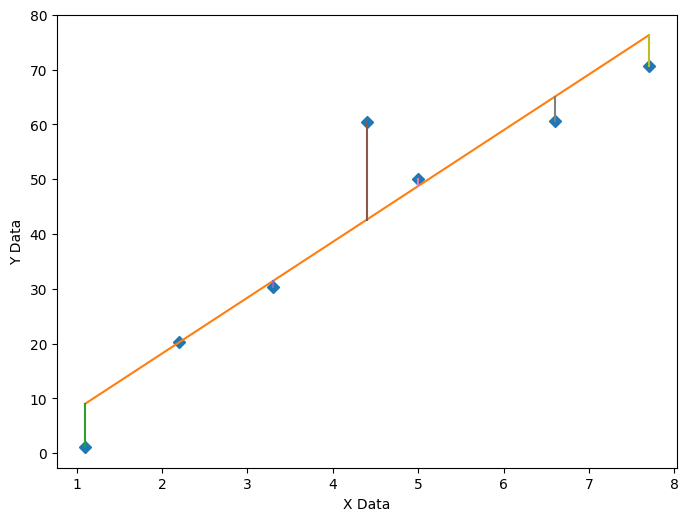

In [2]:
# https://stackoverflow.com/questions/53779773/python-linear-regression-best-fit-line-with-residuals
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xData = numpy.array([1.1, 2.2, 3.3, 4.4, 5.0, 6.6, 7.7])
yData = numpy.array([1.1, 20.2, 30.3, 60.4, 50.0, 60.6, 70.7])


def func(x, a, b): # simple linear example
    return a * x + b


initialParameters = numpy.array([1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    # now add individual line for each point
    for i in range(len(xData)):
        lineXdata = (xData[i], xData[i]) # same X
        lineYdata = (yData[i], modelPredictions[i]) # different Y
        plt.plot(lineXdata, lineYdata)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

# Process

1. Get sample data
2. Split it into a training and test set
3. Design a model that predicts outcomes for the training set
4. Test the model against the test set
5. Use the model to predict future "real-world" values

# Variables

The dependent (predicted) variable is often written as $Y$, and the independent (predictors) variables are often represented as $x_1, x_2, x_3, ..., x_n$.

# Simple Linear Regression

Simple Linear Regression is also known as **Classic Linear Regression** or **Least Squares Method**.

Simple linear regression for a population (hence in Greek) is mathematically written as:
$$
y = \beta_0 + \beta_1 x_1 + \epsilon
$$

Where:
- $y$ - dependent variable (predicted value / output)
- $\beta_0$ - constant (minimum value of $y$ even if other terms are 0)
- $\beta_1$ - independent variable coefficient (quantifies effect of $x_1$ on $y$
- $x_1$ - independent variable (predictor / input)
- $\epsilon$ - error (how far off the observed income is from the prediction)

The $\epsilon$ is also called the residual. The sum of all residuals across all observations is 0.

For a sample, we similarly write the equation as:

$$
\hat{y} = b_0 + b_1 x_1
$$


# Methods for Minimizing Distance

There are several methods for minimizing the distance between your regression line and the data points:

- Least Squares Method (Sum of Squared Errors)
- Sum of Absolute Errors

### Least Squares Method

This method fits the regression line by minimizing the sum of the squares of the residuals. 

# Regression Evaluation Metrics

There are three primary ways to evaluate your regression line:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### Mean Absolute Error

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### Mean Squared Error


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### Root Mean Squared Error

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


### Comparing

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

# Example

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]

df = pd.read_csv( '../data/USA_housing.csv' )

[Expore the USA_Housing data](../data/USA_Housing.ipynb).

### Split the Data

In [35]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [37]:
# Create a new dataframe with just the columns we want as inputs
X = df[ [ 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population' ] ]

In [38]:
# The column we want to predict
y = df[ 'Price' ]

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

### Run Linear Regression

In [44]:
lm = LinearRegression()
lm.fit( X_train, y_train )

LinearRegression()

In [48]:
# Print the intercept for our line
print( lm.intercept_ )

-2640159.796853739


In [49]:
# Print the coefficients for each feature
print( lm.coef_ )

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [56]:
# Create a dataframe out of our coefficients (cdf = coefficients data frame)
cdf = pd.DataFrame( data=lm.coef_, index=X.columns, columns=[ 'Coeff' ] )
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### Make Predictions

In [59]:
predictions = lm.predict( X_test )
predictions

array([1260960.70567629,  827588.75560301, 1742421.24254363, ...,
        372191.40626868, 1365217.15140901, 1914519.54178955])

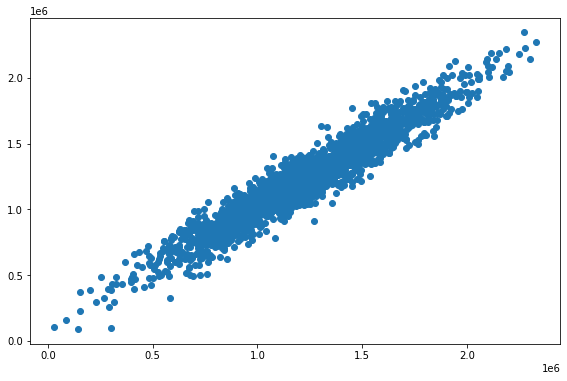

In [61]:
# Compare our predictions to the actual values for the test set
plt.scatter( y_test, predictions )

A perfectly straight line would have been a perfect fit, but seeing a tight positive correlation like this shows that our model is pretty good.

<AxesSubplot:xlabel='Price', ylabel='Count'>

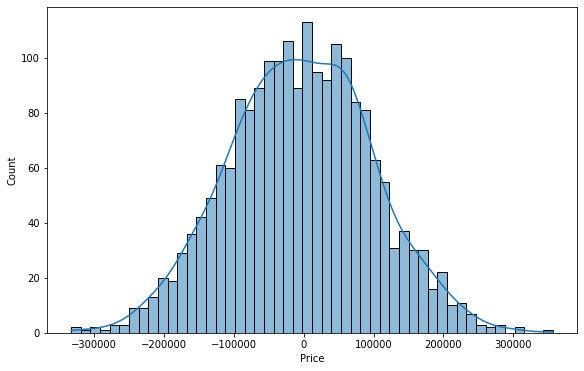

In [70]:
# Look at our residuals
sns.histplot( data=(y_test - predictions), bins=50, kde=True )

Normally distributed residuals are good. That means that our model was a good choice for the data.

In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914928
MSE: 10460958907.208244
RMSE: 102278.82922290538
